In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import scipy.stats as stats

Salary is hypothesised to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals  are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor's, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.


In [2]:
DF = pd.read_csv('/content/SalaryData.csv')

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [4]:
DF.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
DF.shape

(40, 3)

In [8]:
DF.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


1.     State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.


**Null & Alternate Hypothesis for Education:**

**H0:** Mean of "salary" variable is equal to the mean of "Education" variable.

**Ha:** at least one of the Mean of "Salary" vaiable is not equal to the mean of "Education" variable.

***Null & Alternate Hypothesis of Occupation: ***

**H0:** Mean of "salary" variable is equal to the mean of "Occupation" variable.

**Ha:** at least one of the Mean of "Salary" vaiable is not equal to the mean of "Occupation" variable.

2.     Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


In [9]:
formula = 'Salary ~ C(Education)'#step1
model = ols(formula, DF).fit()#step2

In [10]:
model.f_pvalue

1.2577090926628934e-08

In [11]:
formula = 'Salary ~ C(Education)' #step 1
model = ols(formula, DF).fit()#step2
aov_table = anova_lm(model)#step 3
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


**Drawing a point plot**

<ipython-input-12-b238f62365e0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Education', y='Salary',data=DF, ci=None);


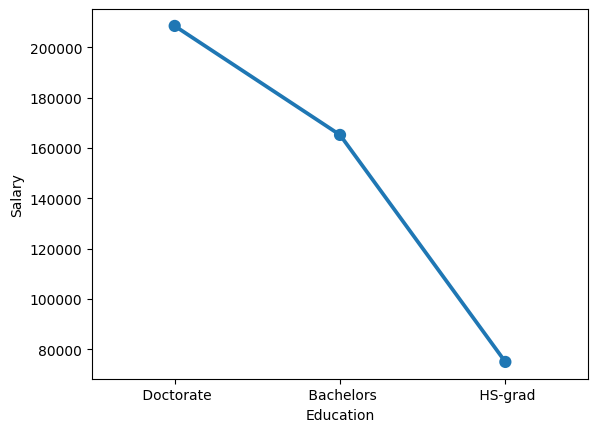

In [12]:
sns.pointplot(x='Education', y='Salary',data=DF, ci=None);

**As the P-Value is less than Alpha hence we reject the null hypothesis. **

3.     Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


In [13]:
formula = 'Salary ~ C(Occupation)'#step1
model = ols(formula, DF).fit()#step2

In [14]:
model.f_pvalue

0.45850782664951195

In [15]:
formula = 'Salary ~ C(Occupation)'#step1
model = ols(formula, DF).fit()#step2
aov_table = anova_lm(model)#step 3
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


**Drawing a Point Plot**

<ipython-input-16-615d9f23ff94>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Occupation', y='Salary',data=DF, ci=None);


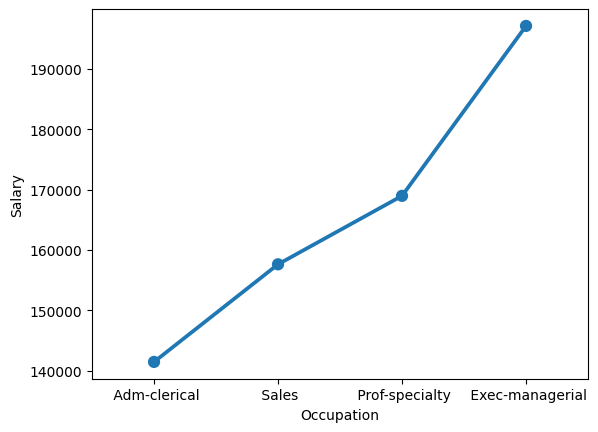

In [16]:
sns.pointplot(x='Occupation', y='Salary',data=DF, ci=None);

**As the P-Value is greater than Alpha, hence we failed to reject null hypothesis **

4.     If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)


5.     Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?


**Null & Alternate Hypothesis for Education & Occupation:**

**H0:** Mean of "salary" variable is equal to the mean of "Education" & Occupation variables.

**Ha:** at least one of the Mean of "Salary" vaiable is not equal to the mean of "Education" and "occupation variables.

In [20]:
formula = 'Salary ~ C(Education)+C(Occupation)' #step1
model = ols(formula, DF).fit() #step2
aov_table = anova_lm(model,typ=2) #step 3
print(aov_table)

                     sum_sq    df          F        PR(>F)
C(Education)   9.695663e+10   2.0  29.510933  3.708479e-08
C(Occupation)  5.519946e+09   3.0   1.120080  3.545825e-01
Residual       5.585261e+10  34.0        NaN           NaN


**Interaction between the two categorical variables:**

H0: There is no interaction in the means of both the category.

Ha: There is atleast one of the group of a category is interaction.

<ipython-input-27-04b0fb2f5c10>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x=DF['Occupation'], y=DF['Salary'], ci=False,hue=DF['Education']);


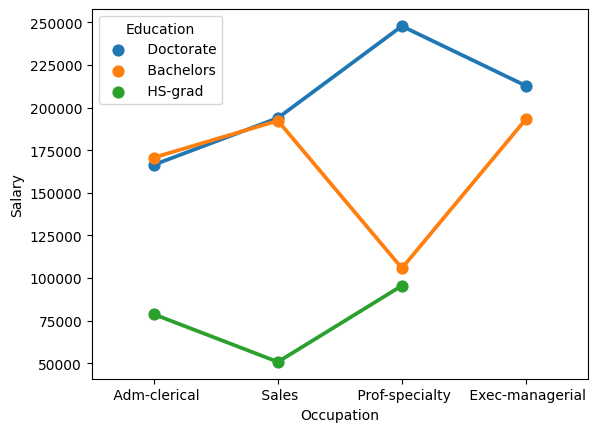

In [27]:
sns.pointplot(x=DF['Occupation'], y=DF['Salary'], ci=False,hue=DF['Education']);

As seen from the plot above, there seems to interaction
between Doctorate and Bachelors on the occupation of ADM-clerical and Sales.

Also, there is some kind of interaction between Bachelors and HS-grad on the Occupation of Prof-specialty.

Very minimum to no interaction between Doctorate and HS-grad on the occupation.

The above indicates that a Doctorate grad may not be highly preferred for a job role and might be over-QUALIFIED which results at par or not significantly higher wage to that of a Bachelors degree holder.

In [25]:
#Interaction Effect:
model=ols('Salary~ C(Education)+ C(Occupation)+ C(Education):(Occupation)',data=DF).fit()
aov_table=anova_lm(model,typ=3)
print(aov_table)

                               sum_sq    df           F        PR(>F)
Intercept                8.742674e+10   1.0  122.951013  6.022884e-12
C(Education)             1.686040e+10   2.0   11.855657  1.726495e-04
C(Occupation)            2.703632e+09   3.0    1.267401  3.039308e-01
C(Education):Occupation  4.584548e+10   9.0    7.163774  3.266622e-05
Residual                 2.062102e+10  29.0         NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '


For the variable Education, as the P value is less than significance level which means that Education has a significant impact on the mean Salary. Therefore, Null Hypothesis are rejected.

Variable Occupation, As the P value is higher than SL of 0.5 hence we failed to reject Null Hypothesis.

About the interaction, P-Value  of Variables “Occupation” + “Education”   is less than 0.5 indicating that there is some statistical evidence about the interaction between the 2.

6.     Explain the business implications of performing ANOVA for this particular case study.

Based on the Anova test below are the observations:

Salary in significantly dependent on the level of education as compared to the job role.

Conclusion of statistics about the interaction between Education and Occupation on Salary, it is safe to say despite occupation less significance there is still some impact of the job role on salary.

We also noticed that few few bachelors are on higher salary in comparison to doctorate. This may be the result of wrong data provided.